In [1]:
'''import the libraries'''

import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

## Load the data

In [2]:
df = pd.read_csv('../../data/drugs.csv', delimiter = ';')
df.head()

,Drug,Value
0,drugY,25.355
1,drugC,13.093
2,drugC,10.114
3,drugX,7.798
4,drugY,18.043


In [3]:
df.describe()

,Value
count,200.000000
mean,16.084485
std,7.223956
min,6.269000
25%,10.445500
50%,13.936500
75%,19.380000
max,38.247000


## Checking the data

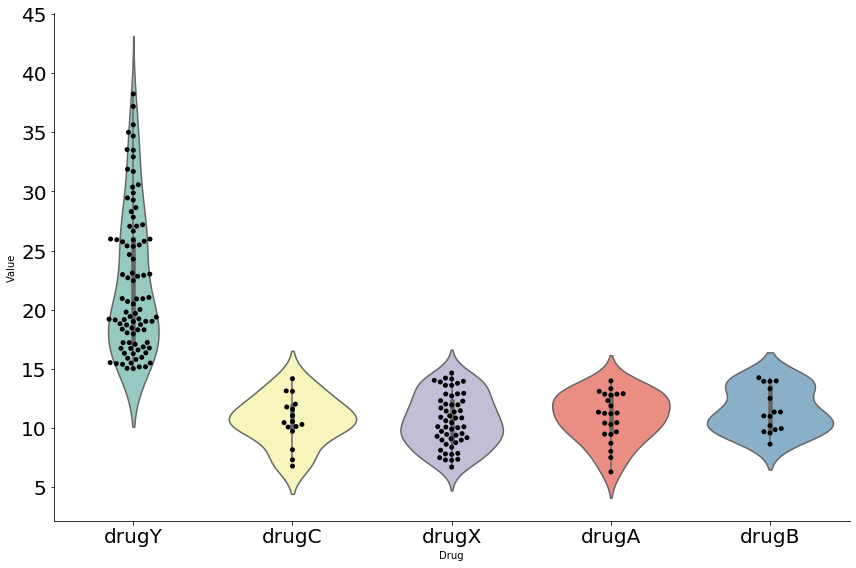

In [4]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = df, x='Drug', y='Value', palette="Set3")
sns.swarmplot(data = df, x='Drug', y='Value', color = "black")
sns.despine()
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
sns.despine()
plt.tight_layout()


## Does drugY leads to a statistically significant different effect when compared to other drugs?

## We can use Pingouin to answer that question

An open-source statistical package written in Python 3 

https://pingouin-stats.org/#

It can be installed with: `pip install pingouin`

In [5]:
'''check unique drugs'''
df.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

## Example for selecting a condition

In [6]:
df.Value[df.Drug=='drugC']

1      13.093
2      10.114
7      11.037
10     11.767
18      7.298
47     10.291
55     14.160
82      9.712
84     10.067
102    13.127
149     8.151
155    10.537
158    10.444
193     6.769
195    11.567
196    12.006
Name: Value, dtype: float64

## t-test example for comparing drugY and drugX

In [7]:
pg.ttest(df.Value[df.Drug=='drugY'], df.Value[df.Drug=='drugX'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,16.696903,123.981604,two-sided,1.630022e-33,"[10.33, 13.11]",2.349314,7.494e+31,1.0


## Is the data normally distributed?

In [8]:
print(pg.normality(df.Value[df.Drug=='drugA']))
print(pg.normality(df.Value[df.Drug=='drugB']))
print(pg.normality(df.Value[df.Drug=='drugC']))
print(pg.normality(df.Value[df.Drug=='drugX']))
print(pg.normality(df.Value[df.Drug=='drugY']))

              W      pval  normal
Value  0.953592  0.346752    True
             W      pval  normal
Value  0.90758  0.106378    True
              W      pval  normal
Value  0.965695  0.764989    True
              W      pval  normal
Value  0.962828  0.092268    True
              W      pval  normal
Value  0.912185  0.000013   False


## The Kruskal-Wallis H-test 

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA.

In [9]:
pg.kruskal(df, dv= 'Value', between= 'Drug')

,Source,ddof1,H,p-unc
Kruskal,Drug,4,148.658098,3.946995e-31


## The Mann–Whitney U test (also called Wilcoxon rank-sum test) is a non-parametric test of the null hypothesis 

In [10]:
p1 = pg.mwu(df.Value[df.Drug=='drugY'], df.Value[df.Drug=='drugX'])
p1

,U-val,alternative,p-val,RBC,CLES
MWU,4914.0,two-sided,9.521006e-24,-1.0,1.0


In [11]:
p2 = pg.mwu(df.Value[df.Drug=='drugY'], df.Value[df.Drug=='drugA'])
p2

,U-val,alternative,p-val,RBC,CLES
MWU,2093.0,two-sided,1.516924e-13,-1.0,1.0


In [12]:
p3 =  pg.mwu(df.Value[df.Drug=='drugY'], df.Value[df.Drug=='drugB'])
p3

,U-val,alternative,p-val,RBC,CLES
MWU,1456.0,two-sided,2.080982e-10,-1.0,1.0


In [13]:
p4 =  pg.mwu(df.Value[df.Drug=='drugY'], df.Value[df.Drug=='drugC'])
p4

,U-val,alternative,p-val,RBC,CLES
MWU,1456.0,two-sided,2.080982e-10,-1.0,1.0


# P-values correction for multiple comparisons.



In [14]:
'''Benjamini–Hochberg FDR correction of an array of p-values'''

pvals = [p1['p-val'].values[0], p2['p-val'].values[0], p3['p-val'].values[0], p4['p-val'].values[0]]
reject, pvals_corr = pg.multicomp(pvals, method='fdr_bh')
print(reject, pvals_corr)

[ True  True  True  True] [3.80840221e-23 3.03384727e-13 2.08098222e-10 2.08098222e-10]
